## `numpy`

[numpy for matlab users](http://mathesaurus.sourceforge.net/matlab-numpy.html)

Reference from chapters 4 and 12.
<img src="imagenes/python_for_data_analysis.png" width="200" height="200" />



In [135]:
import numpy as np
basico = np.array([1,2,3])
print(basico)
matriz = np.array([[1,2,3],[4,5,6]])
print(matriz)
matriz.shape


[1 2 3]
[[1 2 3]
 [4 5 6]]


(2, 3)

In [138]:
# * operator is element-wise
basico.dot(matriz.T)



array([14, 32])

In [146]:
# np.matrix has * operator overloaded as matrix multiplication 
mat = np.matrix(matriz)
bas = basico
bas*mat.T


matrix([[14, 32]])

In [139]:
# Broadcasting (advanced concept chapter 12) http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
basico * matriz

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [140]:
np.mean(basico)


2.0

In [141]:
basico +20

array([21, 22, 23])

## Move back to our cats and dogs example

In [1]:
import dogs_vs_cats as dc
all_files = dc.image_files()    
all_files[1:9]

data file train.zip has already been downloaded
Data has already been extracted


['train/dog.1583.jpg',
 'train/dog.11599.jpg',
 'train/cat.9330.jpg',
 'train/dog.9328.jpg',
 'train/dog.2562.jpg',
 'train/dog.5857.jpg',
 'train/cat.2044.jpg',
 'train/dog.3540.jpg']

### Reading the image as a `numpy` array

First we show the image

train/dog.11599.jpg


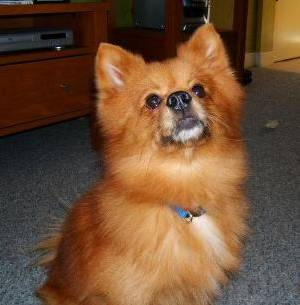

In [12]:
import IPython.display as idisp
image_file = all_files[2]
print(image_file)
idisp.Image(image_file)

In [13]:
from scipy import ndimage
image = ndimage.imread(image_file)
image.shape

(305, 300, 3)

In [14]:
image

array([[[ 46,  70,  98],
        [ 49,  73, 101],
        [ 54,  78, 104],
        ..., 
        [186, 138,  53],
        [187, 139,  54],
        [188, 140,  55]],

       [[103, 121, 145],
        [106, 124, 148],
        [112, 130, 154],
        ..., 
        [186, 138,  53],
        [187, 139,  54],
        [188, 140,  55]],

       [[ 96, 108, 124],
        [ 95, 107, 123],
        [ 91, 103, 119],
        ..., 
        [186, 138,  53],
        [188, 140,  55],
        [189, 141,  56]],

       ..., 
       [[ 93, 106, 114],
        [ 85,  98, 106],
        [101, 114, 122],
        ..., 
        [ 91, 100, 107],
        [ 92, 101, 108],
        [ 94, 101, 107]],

       [[ 97, 110, 118],
        [ 79,  92, 100],
        [ 99, 112, 120],
        ..., 
        [ 95, 104, 111],
        [ 88,  97, 104],
        [ 82,  89,  95]],

       [[ 87, 100, 108],
        [ 62,  75,  83],
        [ 78,  91,  99],
        ..., 
        [ 99, 107, 110],
        [109, 117, 120],
        [110, 118,

In [15]:
np.unique(image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
np.min(image)

0

In [86]:
image.max()

255

In [9]:
image.dtype

dtype('uint8')

In [16]:
# np.<tab>
np.mean(image)

81.646440801457189

### Slice array
We can get each channel of the image

In [17]:
red_image = image[:,:,0]
green_image = image[:,:,1]
blue_image = image[:,:,2]
red_image.shape

(305, 300)

### Plot an image with `matplotlib.pyplot`

[basic tutorial for plotting images](http://matplotlib.org/users/image_tutorial.html)

<IPython.core.display.Javascript object>


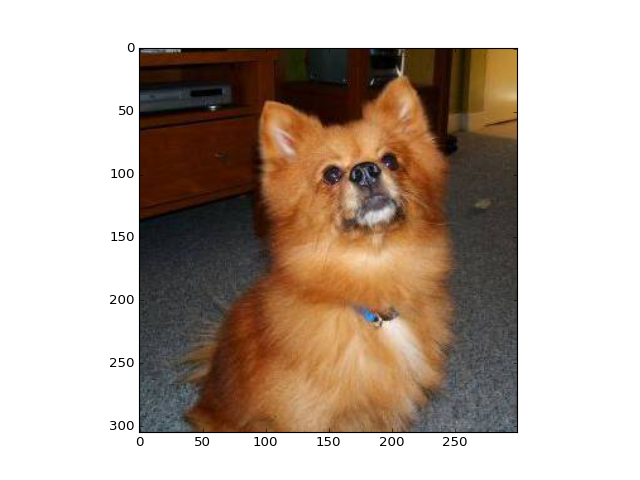

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook
# Show 3-band image.
plt.imshow(image)
# zooming

<IPython.core.display.Javascript object>


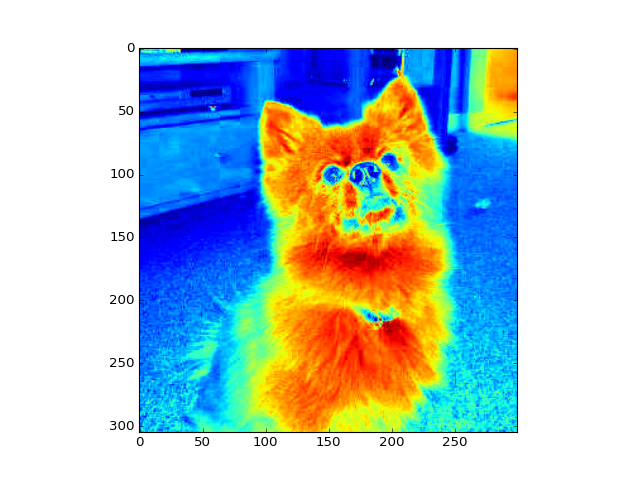

In [19]:
%matplotlib notebook
# Show just 1 band 2 shapes 
plt.imshow(red_image)

<IPython.core.display.Javascript object>


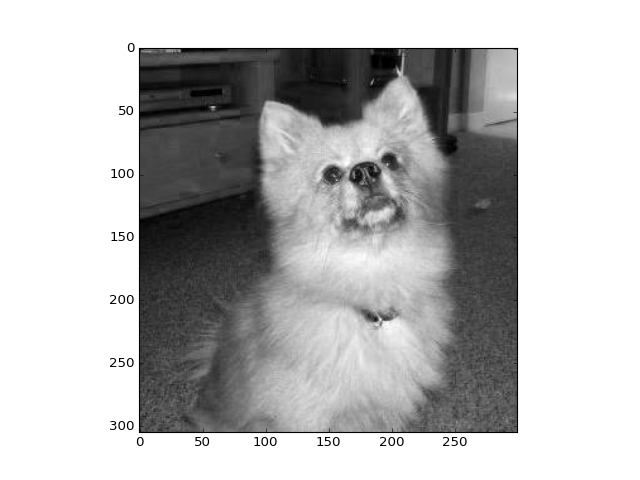

In [21]:
%matplotlib notebook
# change colormap among available color maps http://matplotlib.org/examples/color/colormaps_reference.html
plt.imshow(red_image,cmap="gray")

(125, 125, 3)


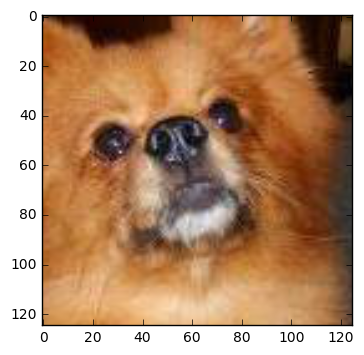

In [26]:
# subsetting the image
image_subset = image[50:175,125:250,:]
print(image_subset.shape)
%matplotlib inline
plt.imshow(image_subset,cmap="gray")

### Convert an image to grey scale

In [77]:
mean_band = (image[:,:,0]+image[:,:,1]+image[:,:,2])/3
print(mean_band.shape)

mean_band.dtype # in python2 int/int -> int :S


(305, 300)


dtype('float64')

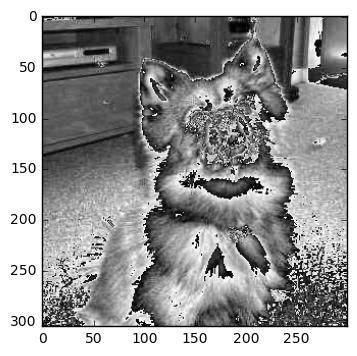

In [84]:
plt.imshow(mean_band,cmap="gray") #ups watch out .dtype!!

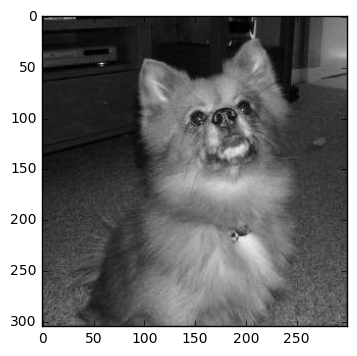

In [85]:
mean_band = (image[:,:,0].astype(np.float64)+image[:,:,1].astype(np.float64)+image[:,:,2].astype(np.float64))/3
plt.imshow(mean_band,cmap="gray")

(305, 300)
float64


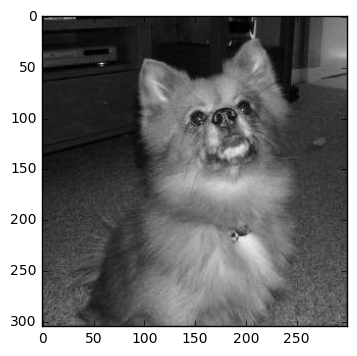

In [79]:
mean_band_2= np.mean(image,axis=2)
print(mean_band_2.shape)
print(mean_band_2.dtype)
plt.imshow(mean_band_2,cmap="gray")

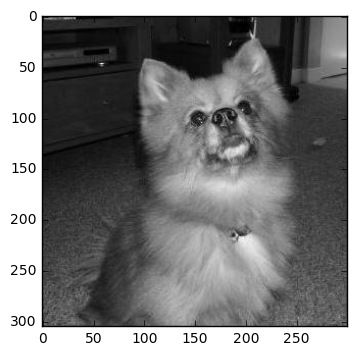

In [41]:
# Y' = 0.299 R + 0.587 G + 0.114 B 
# https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale

grey_image = 0.299*red_image + 0.587*green_image+ 0.114*blue_image
# grey_image = np.dot(image, [0.299, 0.587, 0.114])

plt.imshow(grey_image,cmap="gray")

### Reshaping the image

(91500,)


(array([  2.31600000e+03,   6.86000000e+03,   1.14290000e+04,
          6.24000000e+03,   1.13020000e+04,   7.63000000e+03,
          6.12500000e+03,   5.29500000e+03,   4.75500000e+03,
          5.17100000e+03,   6.21000000e+03,   5.91800000e+03,
          4.94900000e+03,   3.70700000e+03,   1.97000000e+03,
          8.89000000e+02,   4.75000000e+02,   2.02000000e+02,
          5.00000000e+01,   7.00000000e+00]),
 array([   0.    ,   12.6459,   25.2918,   37.9377,   50.5836,   63.2295,
          75.8754,   88.5213,  101.1672,  113.8131,  126.459 ,  139.1049,
         151.7508,  164.3967,  177.0426,  189.6885,  202.3344,  214.9803,
         227.6262,  240.2721,  252.918 ]),
 <a list of 20 Patch objects>)

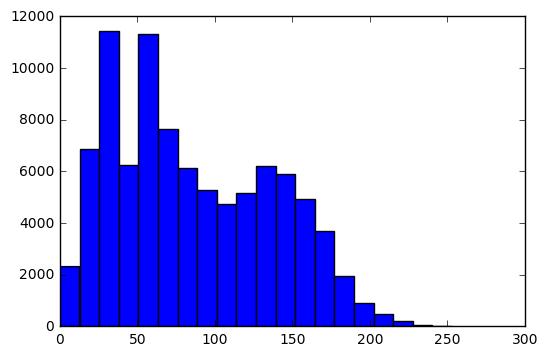

In [52]:
grey_image_flat = grey_image.reshape((grey_image.shape[0]*grey_image.shape[1]))
print(grey_image_flat.shape)
plt.hist(grey_image_flat,bins=20)

In [ ]:
# More efficient
grey_image_flat = grey_image.ravel()
grey_image_flat.shape

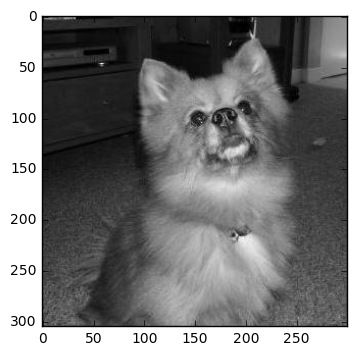

In [55]:
# rebuild the image
# reshape recieves a tuple. 
grey_image_rebuild = grey_image_flat.reshape((grey_image.shape[0],grey_image.shape[1]))
print(grey_image_rebuild.shape)

plt.imshow(grey_image_rebuild,cmap="gray")

(305, 300)


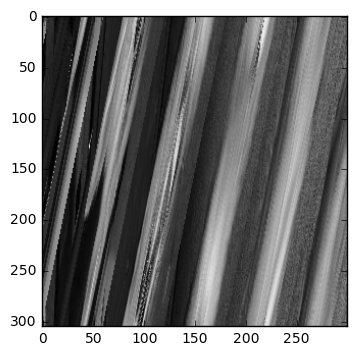

In [56]:
grey_image_rebuild_screwed_up = grey_image_flat.reshape((grey_image.shape[0],grey_image.shape[1]),order="F")

print(grey_image_rebuild_screwed_up.shape)

plt.imshow(grey_image_rebuild_screwed_up,cmap="gray")

**C** order is "row major" rows are stored consecutively. `numpy` default.
<img src="http://eli.thegreenplace.net/images/2015/row-major-2D.png"></img>

**F** order (Fortran, matlab):
<img src="http://eli.thegreenplace.net/images/2015/column-major-2D.png"></img>

Copied from:(http://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays/)

### Transpose matrix

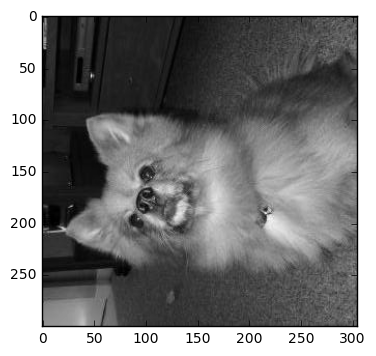

In [57]:
plt.imshow(grey_image.T,cmap="gray")

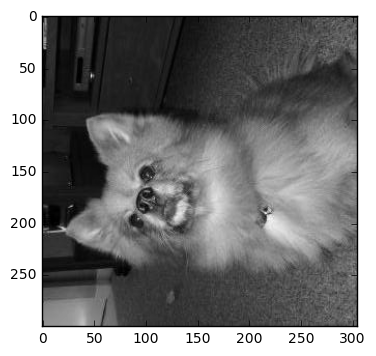

In [58]:
# Change the shape and the order is equivalent!! :D

grey_image_rebuild_screwed_up = grey_image_flat.reshape((grey_image.shape[1],grey_image.shape[0]),order="F")
plt.imshow(grey_image_rebuild_screwed_up,cmap="gray")


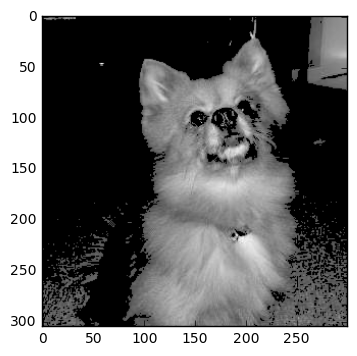

In [91]:
masked = np.copy(grey_image)
masked[masked <= 80] = 0
plt.imshow(masked,cmap="gray")

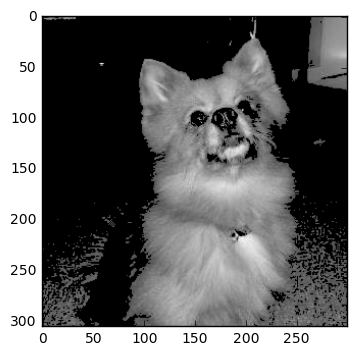

In [90]:
# Another way
masked = np.where(grey_image<80,0,grey_image)
plt.imshow(masked,cmap="gray")

Number of masked elements: 47888


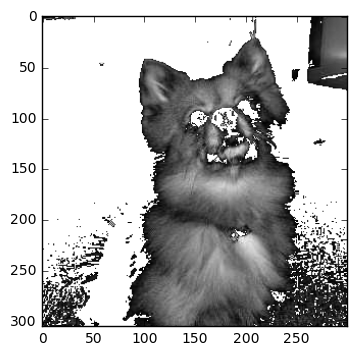

In [98]:
# Using numpy.ma module for masked arrays!
masked = np.ma.masked_where(grey_image<80,grey_image)
# masked.fill_value
# masked.filled to fill the values

plt.imshow(masked,cmap="gray")
print("Number of masked elements: {}".format(np.sum(masked.mask)))

In [100]:
print(grey_image.mean())
print(np.mean(grey_image[grey_image>=80]))
masked.mean()

86.1827683716
132.050685224


132.0506852242502

### Indexing by ints

610


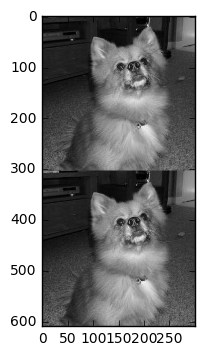

In [108]:

indices = list(range(0,grey_image.shape[0]))*2
print(len(indices))
expanded = grey_image[indices,:]
expanded.shape
plt.imshow(expanded,cmap="gray")


### *To `copy` or not to `copy` that's the question*
* Slicing by slice objects (1:10 is an slice object :S) does not copy.
* Transposing does not copy
* Most of the functions on their documentation says if they will copy or modify the data. **read it if this could be a problem for you!**

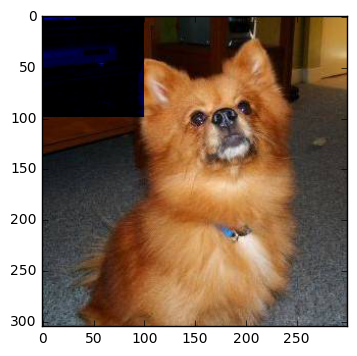

In [113]:
image_2 = np.copy(image)
image_2_fragment = image_2[0:200,0:100,0:2]
image_2_fragment[0:100,0:100,:] = 0
plt.imshow(image_2) # ups !

(300, 305, 3)


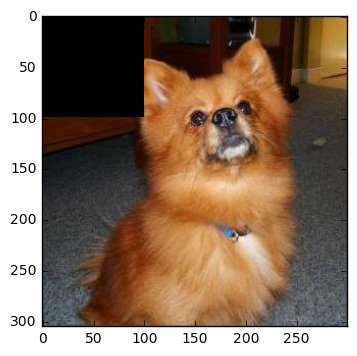

In [116]:
image_2 = np.copy(image)
image_2_fragment = np.transpose(image_2,(1,0,2))
print(image_2_fragment.shape)
image_2_fragment[0:100,0:100,:] = 0
plt.imshow(image_2) # ups !

### Exercise 4
Generate a training set of 4000 randomly selected images (features and labels). 
* Feature matrix must have in each row a flatted image resized to (50,50,3) (i.e. shape must be (4000,`50*50*3`)).
* label matrix must have ones if the row contains the image of a dog and 1 if it has a cat.

### Tips:

#### Select a random sample of images for training `np.random.*`

In [122]:
index_files_selected = np.random.choice(len(all_files),size=10,replace=False)
index_files_selected

array([ 7479,  6769, 20879,  7133,  8462,   538,  6213, 15461, 20137, 11662])

#### `np.concatenate` or `np.stack` to join the images

* `np.concatenate` join two arrays over a **existing** axis.
* ``np.stack` join two arrays over a **new** axis.


In [127]:
image1 = ndimage.imread(all_files[10])
image2 = ndimage.imread(all_files[20])
print(image1.shape)
print(image2.shape)
juntas = np.concatenate([image1,image2], axis=1) #upsss we must rescale the images to concatenate them

(140, 127, 3)
(150, 199, 3)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

#### Downsample the image with `scikit-image`

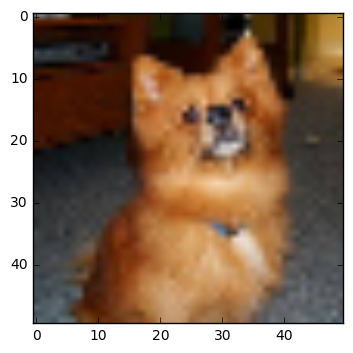

In [119]:
import skimage.transform as sktrans
image_down = sktrans.resize(image, (50, 50, 3))
image_down.shape
plt.imshow(image_down)

(50, 50, 3)
(50, 50, 3)


(50, 100, 3)

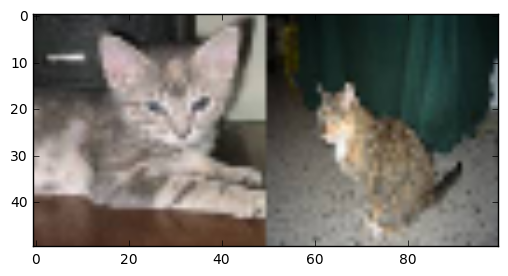

In [130]:
image1 =  sktrans.resize(ndimage.imread(all_files[10]),(50, 50, 3))
image2 =  sktrans.resize(ndimage.imread(all_files[20]),(50, 50, 3))
print(image1.shape)
print(image2.shape)
juntas = np.concatenate([image1,image2], axis=1) # axis=0 
plt.imshow(juntas)
juntas.shape

In [131]:
stacked = np.stack([image1,image2])
stacked.shape


(2, 50, 50, 3)

### Other approach: reserve the memory and fill in sequentially

In [ ]:
feature_array = np.array((4000,50*50*3),dtype=np.float32)
label = np.array((4000),dtype=np.uint8)
for i in index_files_selected:
    # feature_array[i,:] = xxxx

